In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [22]:
Terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')
Terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,197707290007,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5092,197707290008,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5093,197707290009,1977,7,29,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5094,197707290010,1977,7,29,NaN,0,NaN,217,United States,1,...,Joseph Paul Franklin was convicted of this inc...,"Franklin Found Guilty After Admissions,"" Gadsd...","""Frankin Jury Hears His Taped Confession,"" Lod...","John Douglas and Mark Olshaker, ""The Anatomy o...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN


COLUMN NAMES


In [23]:
Terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Displaying the info of the terror dataset

In [24]:
Terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


Checking for the null values.

In [25]:
Terror.isna().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    5080
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       4737
Length: 135, dtype: int64

Preparing the Data


Renaming the important columns

In [26]:
Terror.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Adding a new column

In [27]:
Terror['Casualities'] = Terror.Killed + Terror.Wounded

Making a new dataset of important columns

In [28]:
Terror_updated = Terror[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive',"Casualities"]]


Display 1st five columns

In [29]:
Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


Checking null values for the new dataset


In [30]:
Terror_updated.isna().sum()

Year              0
Month             0
Day               0
Country           0
State            13
Region            0
City              0
latitude         90
longitude        90
Attack_type       0
Killed          612
Wounded        1788
Target           57
Summary        4298
Group             1
Target_type       1
Weapon_type       1
Motive         4560
Casualities    1802
dtype: int64

Number of rows & columns

In [31]:
Terror_updated.shape

(5096, 19)

Final Terror Dataset

In [32]:
Terror_Final = Terror_updated.dropna(axis=0)

Number of rows & columns of final data set

In [33]:
Terror_Final.shape

(504, 19)

Checking for the duplicated value

In [34]:
Terror_Final.duplicated()

5       False
8       False
9       False
11      False
14      False
        ...  
4807    False
4808    False
4812    False
4926    False
5094    False
Length: 504, dtype: bool

1. The Most Attacked countries , city , region, year, month, group, types

In [35]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[0]) #as first entry is 'unknown'
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror_Final)

Country with the most attacks: United States
City with the most attacks: New York City
Region with the most attacks: North America
Year with the most attacks: 1970
Month with the most attacks: 5
Group with the most attacks:       Year  Month  Day        Country        State          Region  \
5     1970      1    1  United States     Illinois   North America   
8     1970      1    2  United States    Wisconsin   North America   
9     1970      1    3  United States    Wisconsin   North America   
11    1970      1    6  United States     Colorado   North America   
14    1970      1    9  United States  Puerto Rico   North America   
...    ...    ...  ...            ...          ...             ...   
4807  1977      5   23    Netherlands      Drenthe  Western Europe   
4808  1977      5   23    Netherlands      Drenthe  Western Europe   
4812  1977      5   26  United States     New York   North America   
4926  1977      6   20  United States   Washington   North America   
5094  

2. Country - Top 10 countries affected by terror attack

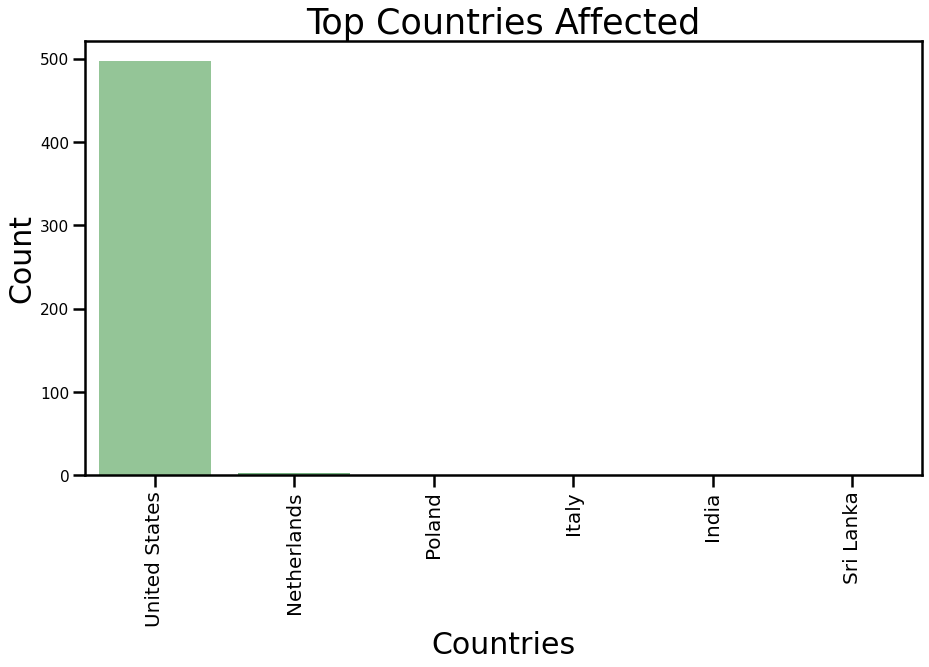

In [36]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

In [37]:
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

1 . United States ------>
                             497 attacks

2 . Netherlands ------>
                             3 attacks

3 . Poland ------>
                             1 attacks

4 . Italy ------>
                             1 attacks

5 . India ------>
                             1 attacks

6 . Sri Lanka ------>
                             1 attacks



3. Year - Number of Terrorist Activities each Year

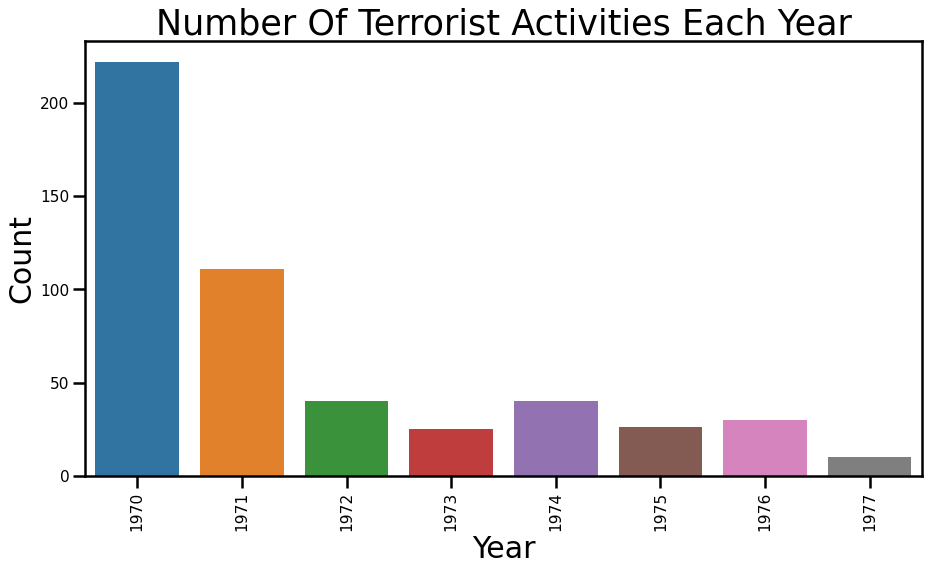

In [38]:
plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()

4. Year - Top 10 Affected Years

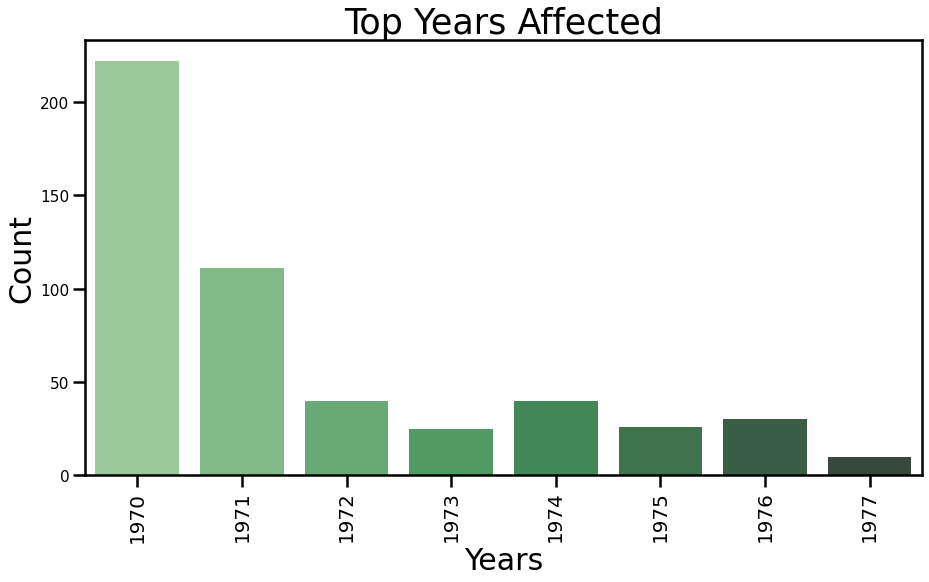

In [39]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

5.Target_type - Counts of attacks on different types of targets

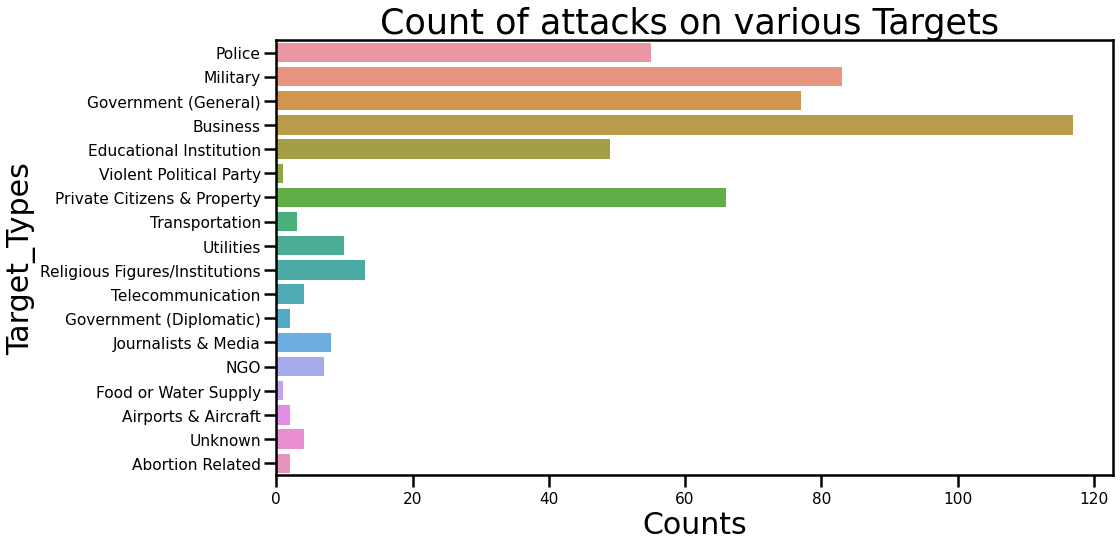

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()

6.Weapon Type - counts of weapons used in attacks

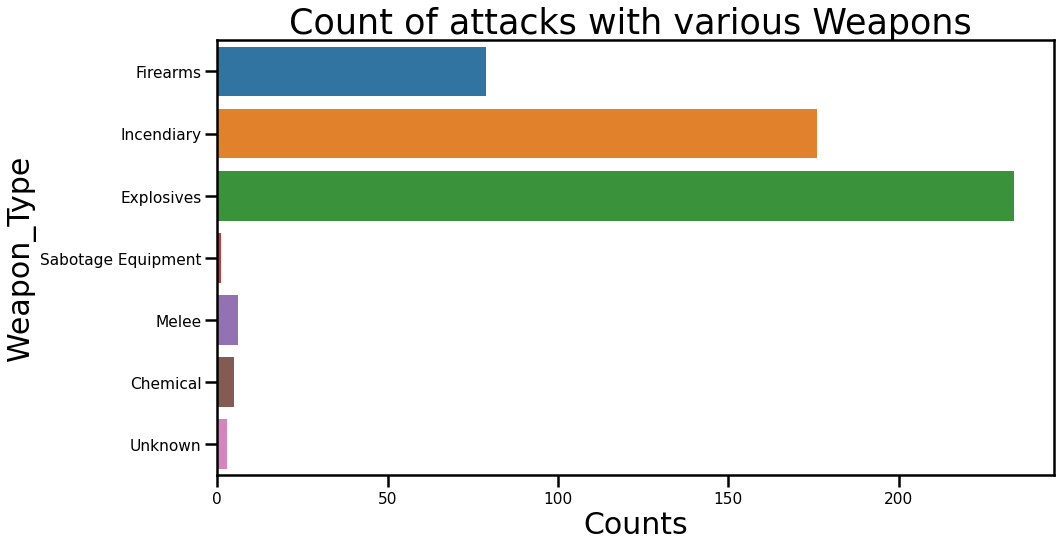

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()

7.Terrorist Organisations - Top 10

In [42]:
Terror_Final['Group'].value_counts()[:10]

Left-Wing Militants                              119
Black Nationalists                                52
Student Radicals                                  37
White extremists                                  34
Unknown                                           31
Fuerzas Armadas de Liberacion Nacional (FALN)     23
Zebra killers                                     20
Chicano Liberation Front                          19
Black Panthers                                    13
Strikers                                          11
Name: Group, dtype: int64

8. Most affected Regions Across the Globe

In [43]:
Terror_Final["Region"].value_counts()

North America     497
Western Europe      4
South Asia          2
Eastern Europe      1
Name: Region, dtype: int64

9.Most Active Terrorist Organization

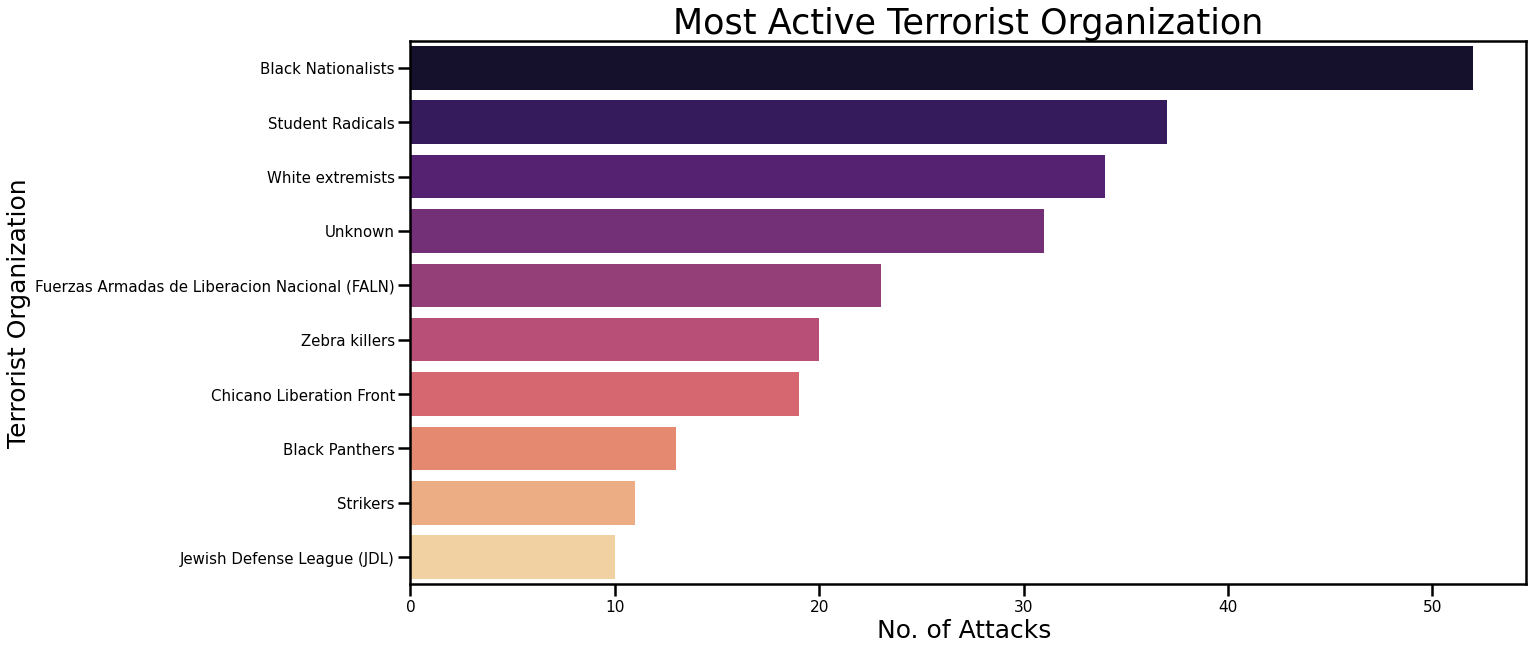

In [44]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=Terror_Final['Group'].value_counts()[1:11].values,
            y=Terror_Final['Group'].value_counts()[1:11].index,
            palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",fontsize=25)
plt.ylabel("Terrorist Organization",fontsize=25)
plt.title("Most Active Terrorist Organization",fontsize=35)
plt.show()
fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')

10. Number of Casuality Due to Terror attacks

In [45]:
idx=1
print("                         Most Active Terror Organizations")
for i in Terror_Final['Group'].value_counts()[1:6].index:
    print(idx,".",i,"---->")                                                                  
    print("                                                     ",Terror_Final['Group'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations
1 . Black Nationalists ---->
                                                      52 attacks

2 . Student Radicals ---->
                                                      37 attacks

3 . White extremists ---->
                                                      34 attacks

4 . Unknown ---->
                                                      31 attacks

5 . Fuerzas Armadas de Liberacion Nacional (FALN) ---->
                                                      23 attacks



In [46]:
lis=[]
total=[]
for i in Terror_Final['Country'].value_counts().index:
    Total = Terror_Final.loc[Terror_Final['Country'] == i, 'Casualities'].sum()
    lis.append([i,Total])
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20])   #country wise casuality over the years from 1970 to 2017

['United States', 281.0] ['Netherlands', 11.0] ['India', 4.0] ['Italy', 1.0] ['Sri Lanka', 1.0] ['Poland', 0.0]


11.Country vs Casuality

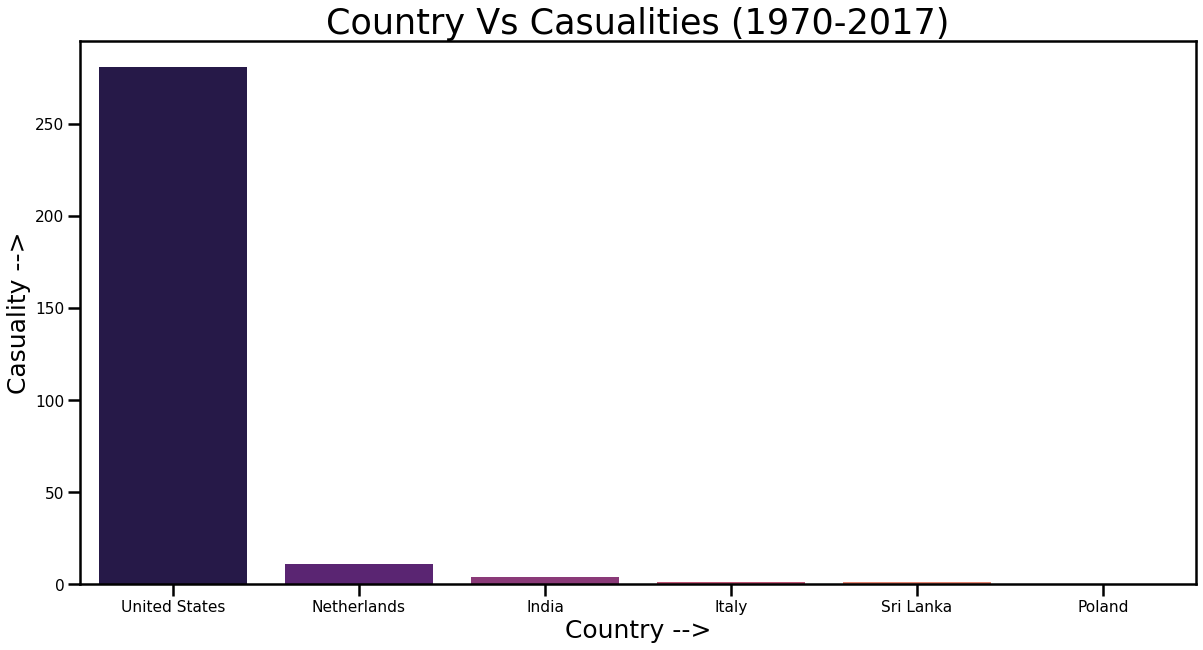

In [47]:
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')

12.Terrorist Activities by Region in each Year through Area Plot

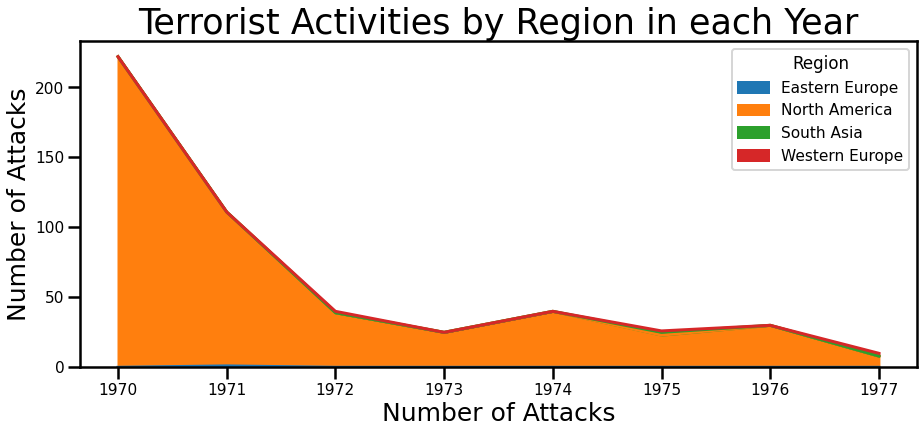

In [48]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()

Conclusion

(1) The Most Attacked countries , city , region, year, month, group, types.

(2) Top 10 countries affected by terror attack

(3) Number of Terrorist Activities each Year

(4) Top 10 Affected Years

(5) Counts of attacks on different types of targets

(6) Counts of weapons used in attacks

(7) Top 10 Terrorist Organisations

(8) Most affected Regions Across the Globe

(9) Most Active Terrorist Organization

(10) Number of Casuality Due to Terror attacks

(11) Country vs Casuality

(12) Terrorist Activities by Region in each Year through Area Plot